# Institución Universitaria Pascual Bravo

Curso: Reconocimeinto de patrones 2024-1

Docente: Juan Carlos Briñez de León


# Segmentación (Histograma de una imagen)

#1. Sementando el fondo y contando objetos

In [ ]:
#Conectando con el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Retomando el ejercicio de la clase pasada

Imprimiendo resultado de segmentación del fondo


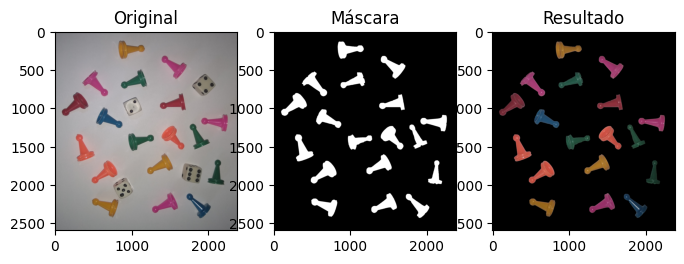


Usted tiene 18 fichas en la escena.


In [ ]:
#Cargando librerías
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar

#Leyendo imagen de entrada
Ruta = r'/content/drive/MyDrive/Semestre 8/ReconocimientoDePatrones/Semana3/Caso_1.bmp' #Ubicación de la imagen desde el google drive
Imagen = cv2.imread(Ruta)#Lee

#Extracción de canales en RGB y HSV
Rojo=Imagen[:,:,2]
Verde=Imagen[:,:,1]
Azul=Imagen[:,:,0]
Gris=cv2.cvtColor(Imagen, cv2.COLOR_BGR2GRAY)

Imagen_hsv = cv2.cvtColor(Imagen,cv2.COLOR_BGR2HSV)
Hue=Imagen_hsv[:,:,0]
Saturation=Imagen_hsv[:,:,1]
Value=Imagen_hsv[:,:,2]

#Segmentando el fondo
[Fl, Cl, Ch]=Imagen.shape
Plantilla_sin_Fondo =np.zeros((Fl,Cl)) #Matriz vacía con el mismo tamaño en filas y columnas de la imagen original
Plantilla_sin_Fondo = (Saturation > 80)

#Limpiando partículas y rellenando agujeros
kernel_O = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
Resultado_limpieza = cv2.morphologyEx(Plantilla_sin_Fondo.astype('uint8'), cv2.MORPH_OPEN, kernel_O)

#Rellenando agujero
kernel_C = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
Resultado_relleno = cv2.morphologyEx(Resultado_limpieza.astype('uint8'), cv2.MORPH_CLOSE, kernel_C)

#Mostrando resultado
Resultado_Fichas = np.zeros((Fl,Cl,Ch))
Resultado_Fichas[:,:,0]=Imagen[:,:,0]*Resultado_relleno
Resultado_Fichas[:,:,1]=Imagen[:,:,1]*Resultado_relleno
Resultado_Fichas[:,:,2]=Imagen[:,:,2]*Resultado_relleno

print('Imprimiendo resultado de segmentación del fondo')
fig2, (axs1,axs2,axs3) =plt.subplots(1, 3,figsize=(8,8))
axs1.imshow(Imagen[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs1.set_title('Original')
axs2.imshow(Resultado_relleno.astype('uint8'),vmin=0, vmax=1,cmap='gray')
axs2.set_title('Máscara')
axs3.imshow(Resultado_Fichas[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs3.set_title('Resultado')
plt.show()
print('')

#Contando objetos
(Objetos,_) =cv2.findContours(Resultado_relleno.astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #Crea un vector que se llama objeto
print('Usted tiene '+ str(len(Objetos))+' fichas en la escena.')

Recorte de objetos en la escena, después de contados.

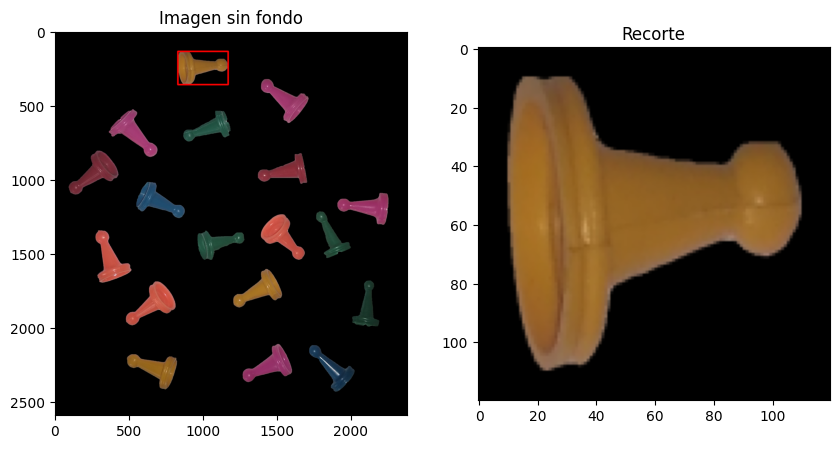

In [ ]:
#Recortando cada ficha dentro de la escena
import time
from IPython.display import clear_output

for i in range(len(Objetos)):
  ROI=Objetos[i]
  x,y,w,h = cv2.boundingRect(ROI)
  Recorte=Resultado_Fichas[y:y+h,x:x+w,:]
  Recorte=cv2.resize(Recorte, (100,100), interpolation = cv2.INTER_AREA)
  Recorte_ajustado=np.zeros((120,120,3))
  Recorte_ajustado[10:110,10:110,:]=(Recorte)

  # Dibuja el bounding box en la imagen
  Resultado_Fichas_2 = Resultado_Fichas.copy()
  color = (0, 0, 255)  # Color verde en formato BGR
  grosor = 10  # Grosor de la línea del bounding box
  cv2.rectangle(Resultado_Fichas_2, (x, y), (x + w, y + h), color,  grosor)

  # Muestra la imagen con el bounding box, al inicio borra lo que haya mostrado antes
  clear_output()
  fig2, (axs1,axs2) =plt.subplots(1, 2,figsize=(10,10))
  axs1.imshow(Resultado_Fichas_2[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
  axs1.set_title('Imagen sin fondo')
  axs2.imshow(Recorte_ajustado[:,:,[2,1,0]].astype('uint8'),cmap='gray',vmin=0, vmax=255)
  axs2.set_title('Recorte')
  plt.show()

  #Pausando el programa para ver resultados
  time.sleep(0.5)

  #Si se requiere, se pueden almacenar los recortes como imágenes nuevas

#2. Análisis de intensidades a través de histogramas

Histograma de una imagen

Un histograma de una imagen es una representación gráfica de la distribución de intensidades de los píxeles en una imagen. Muestra cuántos píxeles de toda la imagen hay por cada nivel de intensidad. En el caso de una imagen en color, se pueden tener histogramas para cada canal de color, como el rojo (R), verde (G), y azul (B) en el modelo de color RGB, o para los canales de matiz (H), saturación (S) y valor (V) en el modelo de color HSV.

Text(0.5, 1.0, 'Histograma V')

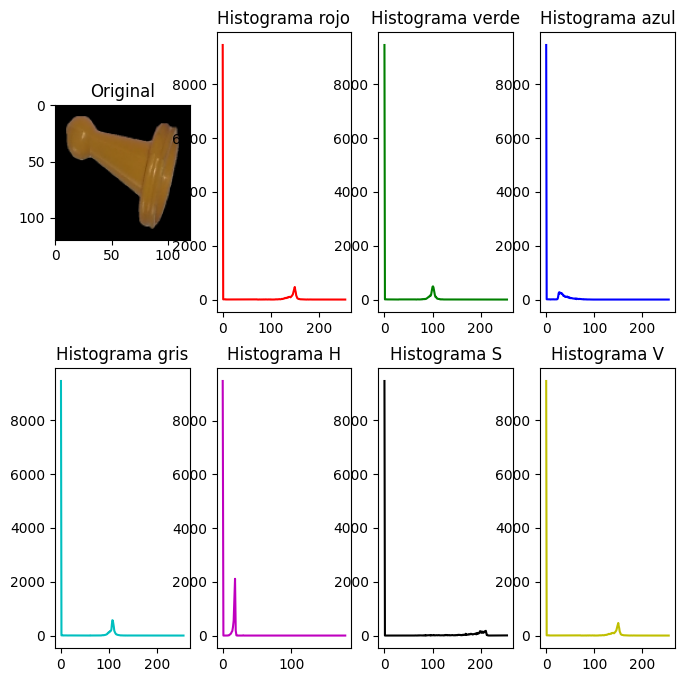

In [ ]:
import random as rnd
Indice = rnd.randint(0,len(Objetos)-1)
Nuevo_Recorte = Objetos[Indice]
x,y,w,h = cv2.boundingRect(Nuevo_Recorte)
Recorte=Resultado_Fichas[y:y+h,x:x+w,:]
Recorte=cv2.resize(Recorte, (100,100), interpolation = cv2.INTER_AREA)
Recorte_ajustado=np.zeros((120,120,3))
Recorte_ajustado[10:110,10:110,:]=(Recorte)
Recorte_ajustado = np.uint8(Recorte_ajustado)

#Extracción de canales en RGB y HSV
Rojo=Recorte_ajustado[:,:,2]
Verde=Recorte_ajustado[:,:,1]
Azul=Recorte_ajustado[:,:,0]
Gris=cv2.cvtColor(Recorte_ajustado.astype('uint8'), cv2.COLOR_BGR2GRAY)

Imagen_hsv = cv2.cvtColor(Recorte_ajustado.astype('uint8'),cv2.COLOR_BGR2HSV)
Hue=Imagen_hsv[:,:,0]
Saturation=Imagen_hsv[:,:,1]
Value=Imagen_hsv[:,:,2]

#Histogramas RGB
hist_rojo = cv2.calcHist([Rojo], [0], None, [256], [0, 256])
hist_verde = cv2.calcHist([Verde], [0], None, [256], [0, 256])
hist_azul = cv2.calcHist([Azul], [0], None, [256], [0, 256])
hist_gris = cv2.calcHist([Gris], [0], None, [256], [0, 256])

#Histogramas HSV
hist_H = cv2.calcHist([Hue], [0], None, [180], [0, 180])
hist_S = cv2.calcHist([Saturation], [0], None, [256], [0, 256])
hist_V = cv2.calcHist([Value], [0], None, [256], [0, 256])

fig, axs =plt.subplots(2, 4,figsize=(8,8))
axs[0,0].imshow(Recorte_ajustado[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
axs[0,0].set_title('Original')
axs[0,1].plot(hist_rojo, color='r')
axs[0,1].set_title('Histograma rojo')
axs[0,2].plot(hist_verde, color='g')
axs[0,2].set_title('Histograma verde')
axs[0,3].plot(hist_azul, color='b')
axs[0,3].set_title('Histograma azul')
axs[1,0].plot(hist_gris, color='c')
axs[1,0].set_title('Histograma gris')
axs[1,1].plot(hist_H, color='m')
axs[1,1].set_title('Histograma H')
axs[1,2].plot(hist_S, color='k')
axs[1,2].set_title('Histograma S')
axs[1,3].plot(hist_V, color='y')
axs[1,3].set_title('Histograma V')